In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn import metrics 

In [2]:
car_df = pd.read_csv("car data.csv")

In [12]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [4]:
car_df.shape

(301, 9)

In [5]:
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
print(car_df.Fuel_Type.value_counts())
print(car_df.Seller_Type.value_counts())
print(car_df.Transmission.value_counts())


Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64
Transmission
0    261
1     40
Name: count, dtype: int64


In [10]:
car_df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
car_df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [13]:
X = car_df.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_df['Selling_Price']

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [16]:
# Linear Regression 

In [18]:
lin_reg_model = LinearRegression()

In [19]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [21]:
train_data_pred = lin_reg_model.predict(X_train) 

In [22]:
# R squared Error

In [23]:
error_score = metrics.r2_score(Y_train, train_data_pred)
print(error_score)

0.8838169193709796


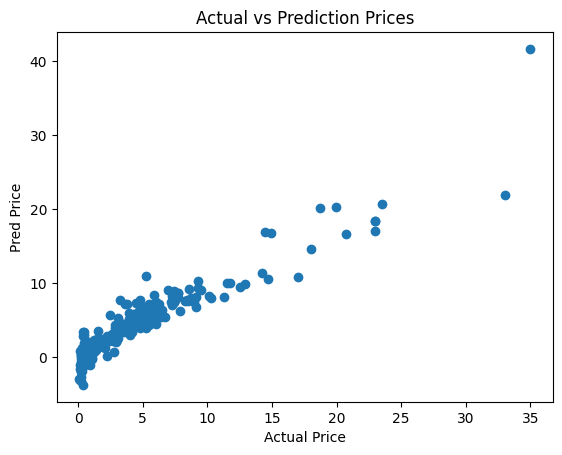

In [24]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Pred Price")
plt.title("Actual vs Prediction Prices")
plt.show()

In [25]:
test_data_pred = lin_reg_model.predict(X_test) 

In [26]:
error_score = metrics.r2_score(Y_test, test_data_pred)
print(error_score)

0.8401532365377697


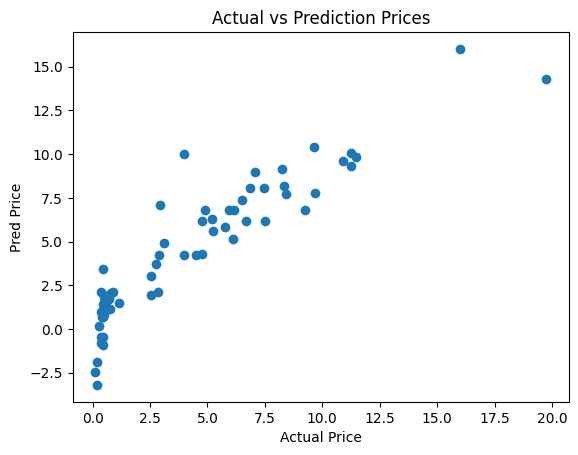

In [27]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Pred Price")
plt.title("Actual vs Prediction Prices")
plt.show()

In [28]:
# Lasso Regression 

In [39]:
lass_reg_model = Lasso()

In [40]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [41]:
train_data_pred = lass_reg_model.predict(X_train) 

In [42]:
error_score = metrics.r2_score(Y_train, train_data_pred)
print(error_score)

0.8427856123435793


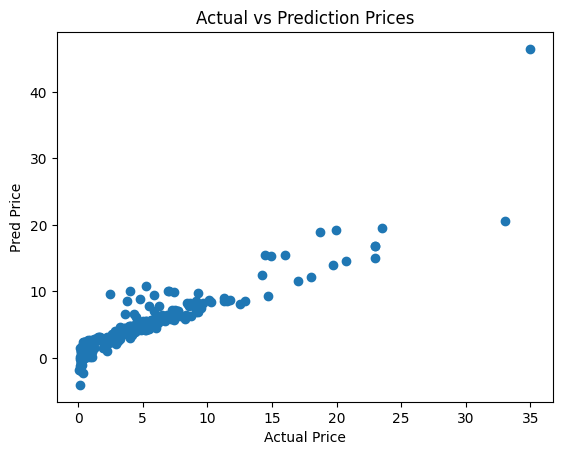

In [43]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Pred Price")
plt.title("Actual vs Prediction Prices")
plt.show()

In [44]:
test_data_pred = lass_reg_model.predict(X_test) 

In [45]:
error_score = metrics.r2_score(Y_test, test_data_pred)
print(error_score)

0.8709167941173195


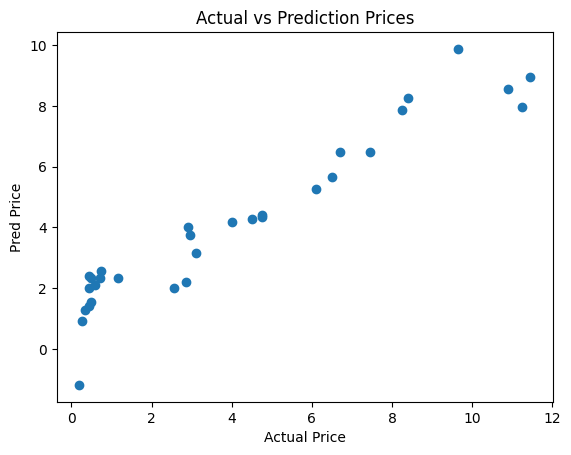

In [46]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Pred Price")
plt.title("Actual vs Prediction Prices")
plt.show()